In [ ]:
!pip install qiskit

     |████████████████████████████████| 6.0MB 2.7MB/s 
     |████████████████████████████████| 18.0MB 60.8MB/s 
     |████████████████████████████████| 235kB 44.3MB/s 
     |████████████████████████████████| 215kB 37.9MB/s 
     |████████████████████████████████| 2.1MB 36.5MB/s 
     |████████████████████████████████| 51kB 5.7MB/s 
     |████████████████████████████████| 1.0MB 37.0MB/s 
     |████████████████████████████████| 194kB 42.7MB/s 
     |████████████████████████████████| 112kB 52.6MB/s 
     |████████████████████████████████| 614kB 41.7MB/s 
     |████████████████████████████████| 3.2MB 32.6MB/s 
     |████████████████████████████████| 6.3MB 36.7MB/s 
  Created wheel for qiskit: filename=qiskit-0.26.2-cp37-none-any.whl size=10491 sha256=f64b9994c1f7e6bedf9ba00dacdc6482809b24e307058ed3bd26b3182eb0a641
  Stored in directory: /root/.cache/pip/wheels/89/89/34/524839952d5a58a7be9789e580bfc1ca883bf6579152444568
  Created wheel for python-constraint: filename=python_constraint-1.4.0

In [ ]:
from qiskit.providers.aer import QasmSimulator  
from qiskit.providers.aer import AerSimulator
from qiskit.circuit.library import TwoLocal
from qiskit.algorithms import VQE
from qiskit.algorithms.optimizers import COBYLA 
from qiskit.circuit.library import EfficientSU2
from qiskit.aqua import set_qiskit_aqua_logging, QuantumInstance
# opflow is Qiskit's module for creating operators like yours
from qiskit import *
from qiskit.opflow import OperatorBase
from qiskit.opflow import Z, X, I  # Pauli Z, X matrices and identity
import pylab
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
counts = []
values = []


def store_intermediate_result(eval_count, parameters, mean, std):
  
  counts.append(eval_count)
  values.append(mean)

In [ ]:
master_counts = []
master_values = []
for h in range (1,5,1): 
    h=+h

print(h)
# or whatever value you have for h
H = - h * ((X ^ I ^ I ^ I) + (I ^ X ^ I ^ I) + (I ^ I ^ X ^ I) + (I ^ I ^ I ^ X))

# you can swap this for a real quantum device and keep the rest of the code the same!
backend = QasmSimulator() 

# COBYLA usually works well for small problems like this one
optimizer = COBYLA(maxiter=200)

# EfficientSU2 is a standard heuristic chemistry ansatz from Qiskit's circuit library
ansatz = EfficientSU2(4, reps=1)

# set the algorithm
vqe = VQE(ansatz, optimizer, quantum_instance=backend, callback=store_intermediate_result)

# run it with the Hamiltonian we defined above
result = vqe.compute_minimum_eigenvalue(H)  

# print the result (it contains lot's of information)
print(result) 

4
{   'aux_operator_eigenvalues': None,
    'cost_function_evals': 159,
    'eigenstate': {   '0000': 0.3365728004459065,
                      '0001': 0.13258252147247765,
                      '0010': 0.16237976320958225,
                      '0011': 0.2209708691207961,
                      '0100': 0.34089725358236606,
                      '0101': 0.1288470508005519,
                      '0110': 0.21423920626253262,
                      '0111': 0.22534695471649932,
                      '1000': 0.40864677595693816,
                      '1001': 0.15309310892394862,
                      '1010': 0.19764235376052372,
                      '1011': 0.2538762001448738,
                      '1100': 0.3563048203434806,
                      '1101': 0.13975424859373686,
                      '1110': 0.23385358667337133,
                      '1111': 0.2633171804117612},
    'eigenvalue': -8.796875,
    'optimal_parameters': {   ParameterVectorElement(θ[11]): -1.6079634096939346,
      

In [ ]:
master_counts = []
master_values = []
for h in range (1,5,1): 
  counts = []
  values = []
  result = vqe.compute_minimum_eigenvalue(H)
  master_counts.append(counts)
  master_values.append(values)
  


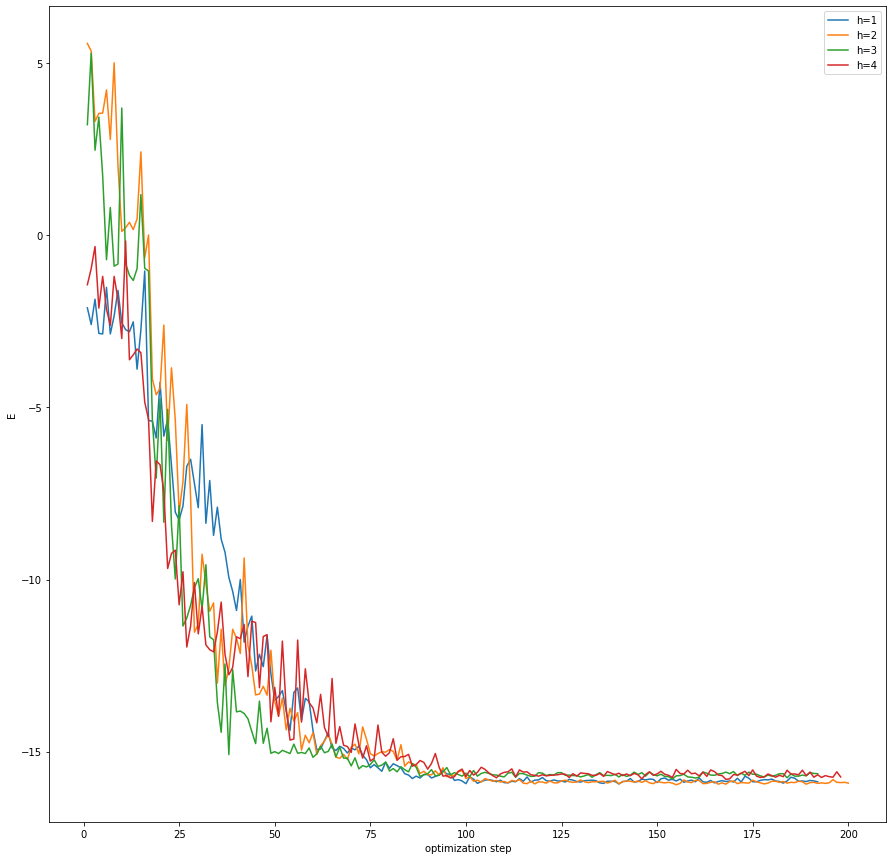

In [ ]:
plt.figure(figsize=(15,15))
plt.plot(master_counts[0],master_values[0])
plt.plot(master_counts[1],master_values[1])
plt.plot(master_counts[2],master_values[2])
plt.plot(master_counts[3],master_values[3])
plt.xlabel('optimization step')
plt.ylabel('E')
plt.legend(['h=1', 'h=2', 'h=3', 'h=4'], loc='upper right')
plt.show()

In [ ]:
 def HamiltonianPreparation(num_of_qubits:int):
  identity_list = [['I' for i in range(num_of_qubits)] for j in range(num_of_qubits)]
  for i in range(num_of_qubits):
    identity_list[i][i] = 'X'
      
  hamiltonian_string = ""

  # for i in range(len):
  #   for j in range(i): 
  #     hamiltonian = hamiltonian 

  for row in identity_list:
    hamiltonian_string += " ( "
    for j in range(len(row)):
      if j < len(row) - 1:
        hamiltonian_string += row[j] + " ^ "
      else:
        hamiltonian_string += row[j]
    hamiltonian_string += " ) + " 
    
  hamiltonian_string = hamiltonian_string[0:-3]

  return hamiltonian_string


In [ ]:
def HamiltonianPreparation_J(num_of_qubits:int):
  identity_list = [['I' for i in range(num_of_qubits)] for j in range(num_of_qubits)]
  for i in range(num_of_qubits):
    if i!=num_of_qubits-1:
      identity_list[i][i] = 'Z'
      identity_list[i][i+1] = 'Z'
    else:
      identity_list[i][i] = 'Z'
      identity_list[i][0] = 'Z'
      
  hamiltonian_string = ""

  # for i in range(len):
  #   for j in range(i): 
  #     hamiltonian = hamiltonian 

  for row in identity_list:
    hamiltonian_string += "( "
    for j in range(len(row)):
      if j < len(row) - 1:
        hamiltonian_string += row[j] + " ^ "
      else:
        hamiltonian_string += row[j]
    hamiltonian_string += ") + " 
    
  hamiltonian_string = hamiltonian_string[0:-3]

  return hamiltonian_string


In [ ]:
 def HamiltonianPreparation_bz(num_of_qubits:int):
  identity_list = [['I' for i in range(num_of_qubits)] for j in range(num_of_qubits)]
  for i in range(num_of_qubits):
    identity_list[i][i] = 'Z'
      
  hamiltonian_string = ""

  # for i in range(len):
  #   for j in range(i): 
  #     hamiltonian = hamiltonian 

  for row in identity_list:
    hamiltonian_string += "( "
    for j in range(len(row)):
      if j < len(row) - 1:
        hamiltonian_string += row[j] + " ^ "
      else:
        hamiltonian_string += row[j]
    hamiltonian_string += " ) + " 
    
  hamiltonian_string = hamiltonian_string[0:-3]

  return hamiltonian_string


In [ ]:
print(HamiltonianPreparation(36))

 ( X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^

In [ ]:
H = - B_Z * (( Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + ( I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + ( I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + ( I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + ( I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + ( I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + ( I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z)
) + J_z * ((( Z ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + ( I ^ Z ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + ( I ^ I ^ Z ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + ( I ^ I ^ I ^ Z ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + ( I ^ I ^ I ^ I ^ Z ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + ( I ^ I ^ I ^ I ^ I ^ Z ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + ( I ^ I ^ I ^ I ^ I ^ I ^ Z ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ Z ^ I ^ I ^ I ^ I ^ I ^ I) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ Z ^ I ^ I ^ I ^ I ^ I) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ Z ^ I ^ I ^ I ^ I) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ Z ^ I ^ I ^ I) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ Z ^ I ^ I) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ Z ^ I) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ Z) + ( Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z))) - B_X * (( X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + ( I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + ( I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + ( I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + ( I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + ( I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + ( I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X)
)

In [ ]:
master_counts = []
master_values = []

h = 1  # or whatever value you have for h
H = - h * ((X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + (I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + (I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + (I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + (I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + (I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + (I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + (I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + (I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + (I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + (I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + (I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + (I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + (I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + (I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + (I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + (I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + (I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + (I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + (I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + (I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + (I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + (I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + (I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + (I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + (I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + (I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + (I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + (I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + (I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + (I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + (I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + (I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + (I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + (I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + (I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + (I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + (I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + (I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + (I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + (I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + (I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + (I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I) + (I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I) + (I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I) + (I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I) + (I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I) + (I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I) + (I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I) + (I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X))


# you can swap this for a real quantum device and keep the rest of the code the same!
backend = AerSimulator(method='matrix_product_state')

# COBYLA usually works well for small problems like this one
optimizer = COBYLA(maxiter=200)

# EfficientSU2 is a standard heuristic chemistry ansatz from Qiskit's circuit library
ansatz = TwoLocal(num_qubits=50, rotation_blocks=['ry', 'rz'], entanglement_blocks=None, entanglement='full', reps=1, skip_unentangled_qubits=False, skip_final_rotation_layer=True)

# set the algorithm
vqe = VQE(ansatz, optimizer, quantum_instance=backend, callback=store_intermediate_result)

# run it with the Hamiltonian we defined above
result = vqe.compute_minimum_eigenvalue(H)  

# print the result (it contains lot's of information)
# print(result) 

In [ ]:
print(result)

{   'aux_operator_eigenvalues': None,
    'cost_function_evals': 200,
    'eigenstate': {   '00001001011010001101000110001000010001010100001110': 0.03125,
                      '00100000001000001101000010001000100101101011010011': 0.03125,
                      '00101000000100101101000010011000010000100101011011': 0.03125,
                      '00101000000110100100100111011011001001010101111010': 0.03125,
                      '00101000001000001101000110001001110011000101010010': 0.03125,
                      '00101000001000101111100110001000110001100011001010': 0.03125,
                      '00101000001100001001101100001001010001001011011110': 0.03125,
                      '00101000001100101101100111000010010100000000010110': 0.03125,
                      '00101000010010011101100100001000010101011111000011': 0.03125,
                      '00101000011110011101000100000010110001011101000010': 0.03125,
                      '00101000011110100101101000001101110001011011011011': 0.03

In [ ]:
counts

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

[[-5.   -4.75 -4.5  ...  4.25  4.5   4.75]
 [-5.   -4.75 -4.5  ...  4.25  4.5   4.75]
 [-5.   -4.75 -4.5  ...  4.25  4.5   4.75]
 ...
 [-5.   -4.75 -4.5  ...  4.25  4.5   4.75]
 [-5.   -4.75 -4.5  ...  4.25  4.5   4.75]
 [-5.   -4.75 -4.5  ...  4.25  4.5   4.75]]


TypeError: ignored

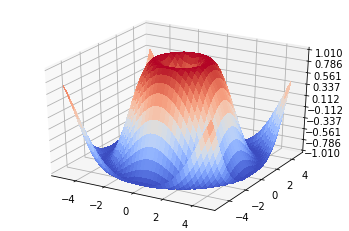

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

print(X)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [ ]:
import numpy as np
from qiskit.providers.aer import AerSimulator, QasmSimulator
from qiskit.algorithms.optimizers import COBYLA 
from qiskit.circuit.library import TwoLocal
from qiskit.aqua.operators import *
from qiskit.aqua import set_qiskit_aqua_logging, QuantumInstance
from qiskit.aqua.algorithms import NumPyMinimumEigensolver, VQE, NumPyEigensolver
from qiskit.circuit import QuantumCircuit, ParameterVector

# pauli_terms = ['IIIIIIIZ', 'IIIIIIZI', 'IIIIIZII' ]
# pauli_weights = [504.0, 1008.0, 2016.0]
# pauli_dict = {'paulis': [{"coeff": {"imag": 0., "real": pauli_weights[i] }, "label": pauli_terms[i]} \
#                          for i in range(len(pauli_terms))]}
Hamiltonian = - 1 * ((X ^ I ^ I ^ I) + (I ^ X ^ I ^ I) + (I ^ I ^ X ^ I) + (I ^ I ^ I ^ X))
ansatz = TwoLocal(num_qubits=4, rotation_blocks=['ry', 'rz'], entanglement_blocks=None, entanglement='full', reps=1, skip_unentangled_qubits=False, skip_final_rotation_layer=True)
print(ansatz)
backend = QasmSimulator()
quantum_instance = QuantumInstance(backend,
                                   shots = 8192,
                                   initial_layout = None,
                                   optimization_level = 3)  

optimizer = COBYLA(maxiter= 100, tol=0.000000001)   
vqe = VQE(Hamiltonian, ansatz, optimizer, initial_point= None , include_custom = False)
print('We are using:', quantum_instance.backend)
vqe_result = vqe.run(quantum_instance)
vqe_result['eigenstate']

ModuleNotFoundError: ignored

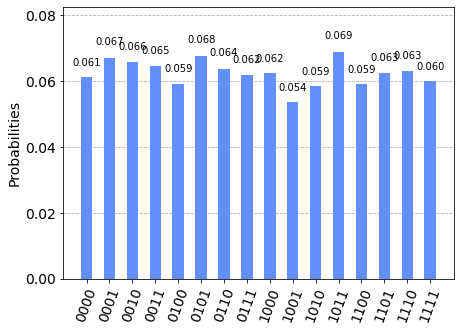

In [ ]:
from qiskit.visualization import plot_histogram

plot_histogram(vqe_result['eigenstate'])